# chapter 9 비지도 학습

## 9.1 2차원 입력 데이터

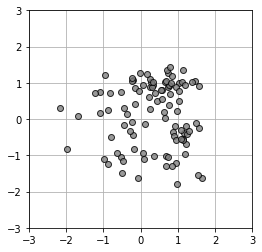

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
X  = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu  = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi  = np.array([0.4, 0.8, 1]) # 누적 확률

for n in range(N) :
  wk = np.random.rand()
  for k in range(K) :
    if wk < Pi[k] :
      T3[n, k] = 1
      break
  for k in range(2) :
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

# 데이터를 그리기
def show_data(x) :
  plt.plot(x[:, 0], x[:, 1], linestyle = 'none', marker = 'o', markersize = 6, markeredgecolor = 'black', color = 'gray', alpha = 0.8)
  plt.grid(True)

# 메인 
plt.figure(1, figsize = (4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X = X, X_range0 = X_range0, X_range1 = X_range1)

## 9.2 K-means 기법

In [2]:
# Mu 및 R 초기화
Mu = np.array([[-2,1],[-2,0], [-2,-1]]) # Mu는  3개의 Muk를 묶은 3x2행렬
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2), dtype=int)] # 모든 데이터가 클래스 0에 속하도록 R을 초기화

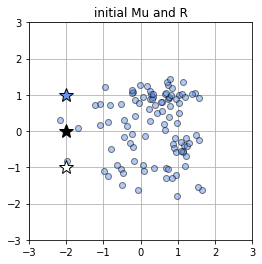

In [3]:
# 데이터를 그리는 함수 
def show_prm(x, r, mu, col) :
  for k in range(K) :
    # 데이터 분포의 묘사
    plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1], marker = 'o', markerfacecolor = X_col[k],
             markeredgecolor = 'k', markersize = 6, alpha = 0.5, linestyle = 'none')
    # 데이터의 평균을 "별표"로 묘사
    plt.plot(mu[k, 0], mu[k, 1], marker = '*', markerfacecolor = X_col[k], markersize = 15, 
             markeredgecolor = 'k', markeredgewidth = 1)  
  plt.xlim(X_range0)
  plt.ylim(X_range1)
  plt.grid(True)

# ----
plt.figure(figsize = (4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

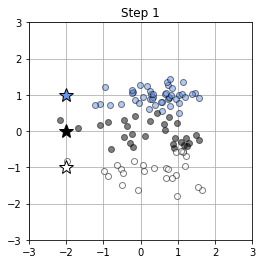

In [4]:
# r을 정한다 (Step 1)
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N,K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0])**2 + (x1[n] - mu[k,1])**2
        r[n, np.argmin(wk)] = 1
    return r

# ------------------
plt.figure(figsize = (4,4))
R = step1_kmeans(X[:,0], X[:, 1], Mu)
show_prm(X,R,Mu, X_col)
plt.title('Step 1')
plt.show()

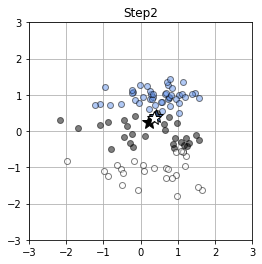

In [5]:
# Mu 결정 (Step2)
def  step2_kmeans(x0,x1,r):
  mu =  np.zeros((K,2))
  for k in range(K):
    mu[k, 0] = np.sum(r[:,k] * x0)/ np.sum(r[:, k])
    mu[k, 1] = np.sum(r[:,k] * x0)/ np.sum(r[:, k])
  return mu

plt.figure(figsize = (4,4))
Mu = step2_kmeans(X[:, 0], X[:,1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

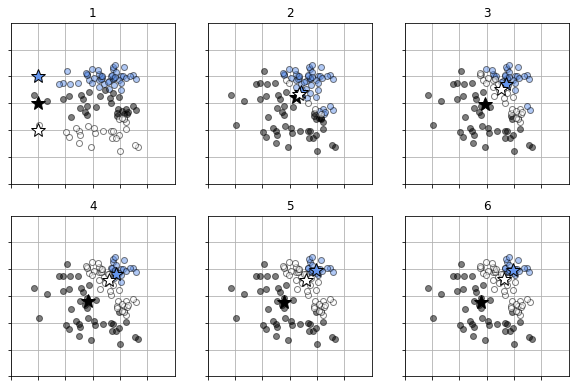

In [9]:
plt.figure(1, figsize = (10,6.5))
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
max_it = 6 # 반복 횟수
for it in range(0,max_it):
  plt.subplot(2,3,it+1)
  R = step1_kmeans(X[:,0], X[:,1], Mu)
  show_prm(X,R,Mu, X_col)
  plt.title("{0:d}".format(it+1))
  plt.xticks(range(X_range0[0], X_range0[1]), "")
  plt.yticks(range(X_range1[0], X_range1[1]), "")
  Mu = step2_kmeans(X[:,0], X[:,1],R)
plt.show()

In [10]:
# 왜곡 척도

# 목적 함수
def distortion_measure(x0, x1, r, mu):
  # 입력은 2차원으로 제한
  N = len(x0)
  J = 0
  for n in range(N):
    for k in range(K):
      J = J + r[n,k] * ((x0[n]- mu[k,0])**2 + (x1[n] - mu[k, 1])**2)
    return J

# test
# Mu와 R의 초기화
Mu = np.array([[-2,1], [-2,0], [-2,-1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N,2), dtype=int)]
distortion_measure(X[:,0], X[:,1], R, Mu)

3.471270869531206